In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd C:\Users\hrish\OneDrive\Documents

C:\Users\hrish\OneDrive\Documents


In [3]:
path="Telco-Customer-Churn.csv"

In [4]:
df=pd.read_csv(path,sep=',')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [8]:
df.drop('customerID',axis=1,inplace=True)

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [16]:
df1.TotalCharges.dtypes

dtype('float64')

In [17]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

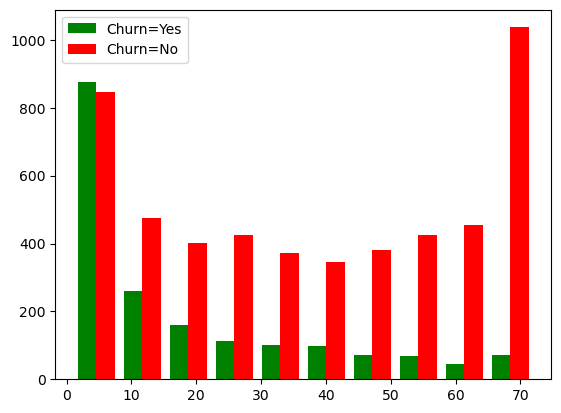

In [18]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
Monthly_charges_churn_no=df1[df1.Churn=='No'].MonthlyCharges
Monthly_charges_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

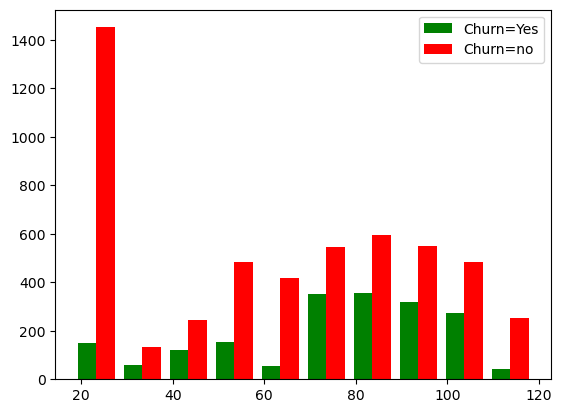

In [20]:
plt.hist([Monthly_charges_churn_yes,Monthly_charges_churn_no],color=['green','red'],label=['Churn=Yes','Churn=no'])
plt.legend()

In [21]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [22]:
unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [25]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

In [30]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
df1_num_corr = df1_num.corr()['Churn'][:-1] # -1 means that the latest row is SalePrice
top_features = df1_num_corr[abs(df1_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Churn:\n{}".format(len(top_features), top_features))

There is 0 strongly correlated values with Churn:
Series([], Name: Churn, dtype: float64)


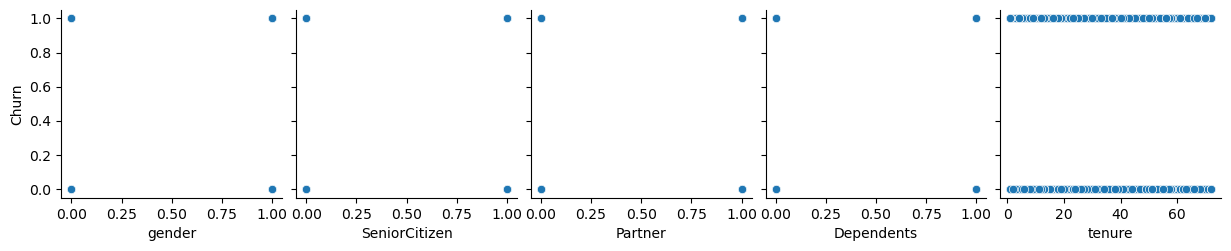

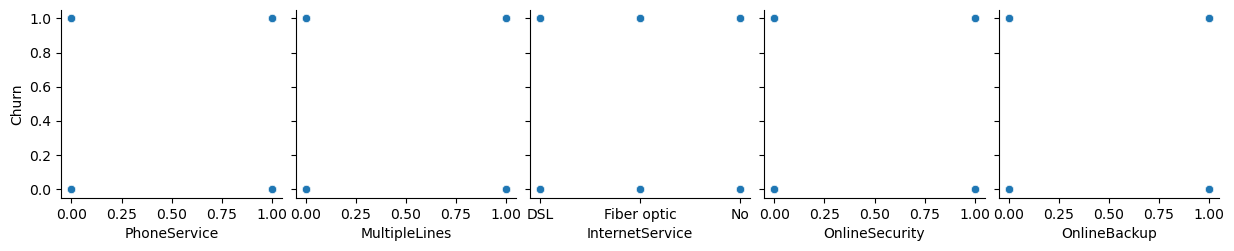

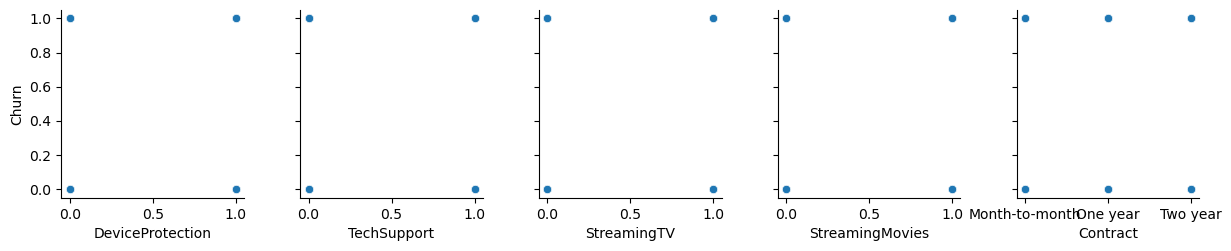

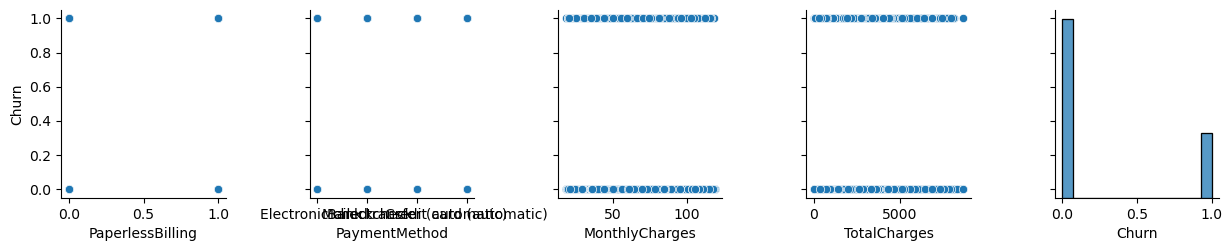

In [31]:
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['Churn'])

In [32]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [34]:
bool_cols=['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df2[bool_cols] = df2[bool_cols].astype(int)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [36]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [37]:
from sklearn.preprocessing import MinMaxScaler

df2['tenure'] = MinMaxScaler().fit_transform(df2[['tenure']])

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [39]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6887,1,0,1,1,0.478873,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5689,0,0,0,0,0.056338,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1937,1,0,1,1,0.169014,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2904,0,0,0,0,0.338028,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1956,1,0,0,0,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [42]:
df2.drop(columns=['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies',
'PaperlessBilling','Partner','Dependents','TotalCharges'])

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0.000000,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0.464789,56.95,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0.014085,53.85,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0.619718,42.30,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0.014085,70.70,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0.323944,84.80,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1.000000,103.20,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,0.140845,29.60,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,0.042254,74.40,1,0,1,0,1,0,0,0,0,0,1


In [43]:
data=df2

In [44]:
X=data[['gender','SeniorCitizen','tenure',
'MonthlyCharges',
'InternetService_DSL',
'InternetService_Fiber optic',
'InternetService_No',
'Contract_Month-to-month',
'Contract_One year',
'Contract_Two year',
'PaymentMethod_Bank transfer (automatic)',
'PaymentMethod_Credit card (automatic)',
'PaymentMethod_Electronic check',
'PaymentMethod_Mailed check']]

In [45]:
y=data['Churn']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [47]:
print("Training Features\n",X_train)
print("\nTesting Features\n",X_test)
print("\nTraining labels\n",y_train)
print("\nTesting Labels\n",y_test)

Training Features
       gender  SeniorCitizen    tenure  MonthlyCharges  InternetService_DSL  \
320        1              1  0.746479           82.45                    1   
2597       0              0  0.985915          109.60                    0   
4580       1              0  0.985915           19.10                    0   
524        0              0  0.464789          100.05                    0   
3014       0              1  0.605634           89.20                    0   
...      ...            ...       ...             ...                  ...   
4810       1              1  0.197183           89.85                    0   
1665       1              0  0.112676           76.85                    0   
5466       0              0  0.126761           19.95                    0   
4277       1              0  0.070423           20.95                    0   
5536       0              0  0.112676           34.70                    1   

      InternetService_Fiber optic  InternetS

In [48]:
import numpy as np
import pandas as pd

class Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def derivative(self, x):
        return x * (1 - x)

class ReLU:
    def forward(self, x):
        return np.maximum(0, x)
    
    def derivative(self, x):
        return (x > 0).astype(float)

class DenseLayer:
    def __init__(self, input_size, output_size, activation_function):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size)) 
        self.activation_function = activation_function
    
    def forward(self, X):
        self.input = X
        self.linear_output = np.dot(X, self.weights) + self.bias
        self.output = self.activation_function.forward(self.linear_output)
        return self.output
    
    def backward(self, d_output, learning_rate):
        d_activation = d_output * self.activation_function.derivative(self.output)
        d_weights = np.dot(self.input.T, d_activation)
        d_bias = np.sum(d_activation, axis=0, keepdims=True)
        d_input = np.dot(d_activation, self.weights.T)
        
        
        self.weights -= learning_rate * d_weights
        self.bias -= learning_rate * d_bias
        
        return d_input

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = DenseLayer(input_size, hidden_size, ReLU())
        self.output_layer = DenseLayer(hidden_size, output_size, Sigmoid())
    
    def forward(self, X):
        self.hidden_output = self.hidden_layer.forward(X)
        self.final_output = self.output_layer.forward(self.hidden_output)
        return self.final_output
    
    def backward(self, X, y, learning_rate):
        output_error = self.final_output - y
        self.output_layer.backward(output_error, learning_rate)
        
        hidden_error = self.output_layer.backward(output_error, learning_rate)
        self.hidden_layer.backward(hidden_error, learning_rate)
    
    def train(self, X, y, epochs, learning_rate, verbose=True):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            
           
            epsilon = 1e-10
            loss = -np.mean(y * np.log(self.final_output + epsilon) + (1 - y) * np.log(1 - self.final_output + epsilon))
            
            if verbose and epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                print("Hidden Layer Weights:\n", self.hidden_layer.weights)
                print("Hidden Layer Biases:\n", self.hidden_layer.bias)
                print("Output Layer Weights:\n", self.output_layer.weights)
                print("Output Layer Biases:\n", self.output_layer.bias)
                print("-" * 40)
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int) 
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y) * 100



X = X_train.values
y = y_train.values.reshape(-1, 1) 


X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) 

input_size = X.shape[1]
hidden_size = 8
output_size = 1
learning_rate = 0.01
epochs = 20000


nn = NeuralNetwork(input_size, hidden_size, output_size)


nn.train(X, y, epochs, learning_rate, verbose=True)


accuracy = nn.accuracy(X, y)
print(f"\nFinal Accuracy: {accuracy:.2f}%")


Epoch 0, Loss: 0.6933
Hidden Layer Weights:
 [[ 0.01772506  0.03311141 -0.00029106  0.00259494 -0.01481417 -0.00763136
  -0.0633389  -0.01601513]
 [-0.0280504  -0.04106633 -0.00407052 -0.0394018  -0.07001994 -0.01654985
  -0.05058394  0.00036559]
 [-0.00106933  0.03425881 -0.01770939  0.11082535  0.08104712  0.0165441
   0.06565351  0.06646676]
 [-0.04247099 -0.09361864 -0.02222183 -0.09248257 -0.18152393 -0.00761895
  -0.12577057  0.03182864]
 [ 0.04065658 -0.00363431 -0.00995863 -0.06920348 -0.02037696  0.06996264
  -0.00435802  0.0047549 ]
 [-0.05116408 -0.06216273 -0.01469071 -0.05805786 -0.12455701 -0.03365649
  -0.11140081 -0.00283793]
 [ 0.01486123  0.09610845  0.00617045  0.15271273  0.19345386 -0.01379455
   0.15610534 -0.01664514]
 [-0.0231479  -0.04871167  0.0093198  -0.15757789 -0.09159342 -0.00498579
  -0.14499708 -0.01855512]
 [ 0.06175704  0.07170835 -0.02286872  0.09096217 -0.01574098 -0.01446061
   0.05269452  0.00336013]
 [-0.04185335 -0.00180965 -0.00181095  0.084382

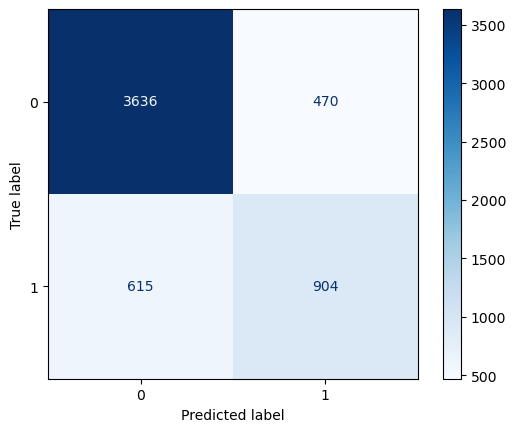

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = nn.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()